<a href="https://colab.research.google.com/github/sumitbawane/Complete-Python-3-Bootcamp/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap

In [ ]:
train=pd.read_csv('DATASET1/train.csv')
test=pd.read_csv('DATASET1/test.csv')
val=pd.read_csv('DATASET1/val.csv')

In [ ]:
train.head()

,x1,x2,label
0,-2.608344,-5.952694,2.0
1,-1.942127,-1.842049,1.0
2,-2.633272,-0.578644,1.0
3,5.979702,-0.361398,0.0
4,-2.084220,-2.970482,2.0


In [ ]:
x_train=train.iloc[:,:2].values.astype(np.float64)
y_train=train.iloc[:,2].values.astype(np.float64)
x_test=test.iloc[:,:2].values.astype(np.float64)
y_test=test.iloc[:,2].values.astype(np.float64)
x_val=val.iloc[:,:2].values.astype(np.float64)
y_val=val.iloc[:,2].values.astype(np.float64)

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k

    # Fit the model by storing the training data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Predict the class of a single data point
    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    # Helper function to predict the class of one sample
    def _predict(self, x):
        # Compute the distance between x and all training examples
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common()

        if len(most_common) > 1 and most_common[0][1] == most_common[-1][1]:
        # Tie situation (check against the last element for multiple ties)
          tied_classes = [c[0] for c in most_common]

        # Calculate average distances for tied classes
          avg_distances = {}
          for c in tied_classes:
              distances_c = [distances[i] for i in k_indices if self.y_train[i] == c]
              avg_distances[c] = np.mean(distances_c)

          min_dist_class = min(tied_classes, key=lambda c: avg_distances[c])
          return min_dist_class
        else:
        # No tie
            return most_common[0][0]

    # Euclidean distance calculation
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNR:
    def __init__(self, k):
        self.k = k

    # Fit the model by storing the training data
    def fit(self, X_train, y_train):
        self.X_train = generate_representatives(X_train,y_train,self.k)[0]
        self.y_train = generate_representatives(X_train,y_train,self.k)[1]

    # Predict the class of a single data point
    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    # Helper function to predict the class of one sample
    def _predict(self, x):
        # Compute the distance between x and all training examples
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common()

        if len(most_common) > 1 and most_common[0][1] == most_common[-1][1]:
        # Tie situation (check against the last element for multiple ties)
          tied_classes = [c[0] for c in most_common]

        # Calculate average distances for tied classes
          avg_distances = {}
          for c in tied_classes:
              distances_c = [distances[i] for i in k_indices if self.y_train[i] == c]
              avg_distances[c] = np.mean(distances_c)

          min_dist_class = min(tied_classes, key=lambda c: avg_distances[c])
          return min_dist_class
        else:
        # No tie
            return most_common[0][0]

    # Euclidean distance calculation
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def generate_representatives(X, y, m):
        representatives = []
        y_rep = []
        classes = np.unique(y)

        for cls in classes:
            X_class = X[y == cls]

            # Initialize centroids randomly
            centroids = X_class[np.random.choice(X_class.shape[0], m, replace=False)]

            # KMeans iteration
            while True:
                # Assign data points to clusters
                labels = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X_class])

                # Update centroids
                new_centroids = np.array([X_class[labels == k].mean(axis=0) for k in range(m)])

                # Check for convergence
                if np.allclose(centroids, new_centroids):
                    break

                centroids = new_centroids

            representatives.append(centroids)
            y_rep.append([cls] * m)

        return np.vstack(representatives), np.hstack(y_rep)

In [ ]:
class NaiveBayes:
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.classes = np.unique(y_train)
        n_classes = len(self.classes)

        # Calculate mean, variance, and prior for each class
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X_train[y_train == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # Calculate posterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        # Return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]

    # Probability density function for Gaussian distribution
    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [ ]:
class BayesClassifier:
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)  # Find the unique class labels
        n_features = X_train.shape[1]  # Number of features
        n_classes = len(self.classes)  # Number of classes

        # Initialize mean, covariance, and prior arrays for each class
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.cov = []
        self.priors = np.zeros(n_classes, dtype=np.float64)

        # For each class, calculate the mean, covariance matrix, and prior probability
        for idx, c in enumerate(self.classes):
            X_c = X_train[y_train == c]  # Select only the samples that belong to class c
            self.mean[idx, :] = np.mean(X_c, axis=0)
            self.cov.append(np.cov(X_c.T))  # Full covariance matrix for each class
            self.priors[idx] = X_c.shape[0] / float(X_train.shape[0])  # Prior P(C)

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # Calculate the posterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])  # log(P(C))
            class_conditional = self._pdf(idx, x)  # log(P(x|C))
            posterior = prior + class_conditional  # log(P(x|C) * P(C))
            posteriors.append(posterior)

        # Return the class with the highest posterior probability
        return self.classes[np.argmax(posteriors)]

    # Multivariate Gaussian probability density function
    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        cov = self.cov[class_idx]
        cov_inv = np.linalg.inv(cov)  # Inverse of covariance matrix
        cov_det = np.linalg.det(cov)  # Determinant of covariance matrix

        d = len(x)  # Number of features
        diff = x - mean

        # Calculate the probability density function for multivariate Gaussian
        exponent = -0.5 * np.dot(np.dot(diff.T, cov_inv), diff)
        pdf = -0.5 * (d * np.log(2 * np.pi) + np.log(cov_det)) + exponent
        return pdf

In [ ]:
def display_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"{classifier_name} Confusion Matrix:")
    print(cm)

In [ ]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary", level_curves=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))

    if level_curves is not None:
        for mean, cov in level_curves:
            plt.contour(xx, yy, multivariate_gaussian(np.c_[xx.ravel(), yy.ravel()], mean, cov).reshape(xx.shape), colors='k', levels=5)

    plt.title(title)
    plt.show()

In [ ]:
def multivariate_gaussian(X, mean, cov):
    k = len(mean)
    cov_inv = np.linalg.inv(cov)
    term1 = 1 / (np.sqrt((2 * np.pi) ** k * np.linalg.det(cov)))
    term2 = np.exp(-0.5 * np.sum((X - mean).dot(cov_inv) * (X - mean), axis=1))
    return term1 * term2


In [ ]:
def generate_level_curves(X, y):
    level_curves = []
    classes = np.unique(y)

    for cls in classes:
        X_class = X[y == cls]
        mean = np.mean(X_class, axis=0)
        cov = np.cov(X_class.T)
        level_curves.append((mean, cov))

    return level_curves


DATASET 1

In [ ]:
for i in [1,3,7,15]:
  print(f"KNN with k={i}")
  knn=KNN(i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_train)
  display_confusion_matrix(y_train,y_pred,"KNN")
  accuracy=accuracy_score(y_train,y_pred)
  print(accuracy)

KNN with k=1
KNN Confusion Matrix:
[[281   0   0]
 [  0 291   0]
 [  0   0 268]]
1.0
KNN with k=3
KNN Confusion Matrix:
[[275   1   5]
 [  0 289   2]
 [  2   3 263]]
0.9845238095238096
KNN with k=7
KNN Confusion Matrix:
[[275   1   5]
 [  0 289   2]
 [  2   4 262]]
0.9833333333333333
KNN with k=15
KNN Confusion Matrix:
[[275   1   5]
 [  0 289   2]
 [  2   4 262]]
0.9833333333333333


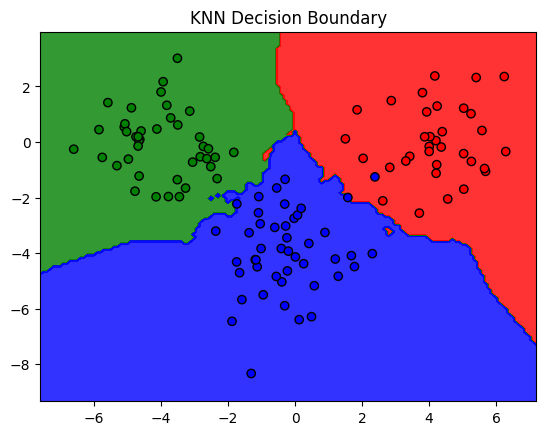

In [ ]:
knn=KNN(3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
plot_decision_boundary(knn, x_test, y_test, title="KNN Decision Boundary")

KNN Confusion Matrix:
[[34  0  0]
 [ 0 41  0]
 [ 1  0 44]]


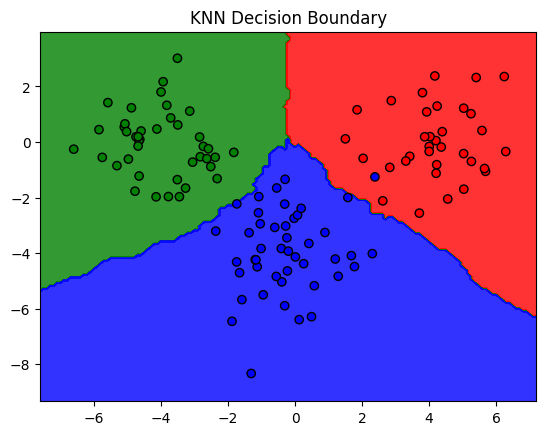

In [ ]:
knn=KNN(15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
display_confusion_matrix(y_test,y_pred,"KNN")
plot_decision_boundary(knn, x_test, y_test, title="KNN Decision Boundary")

Naive Bayes Confusion Matrix:
[[34  0  0]
 [ 0 41  0]
 [ 1  0 44]]


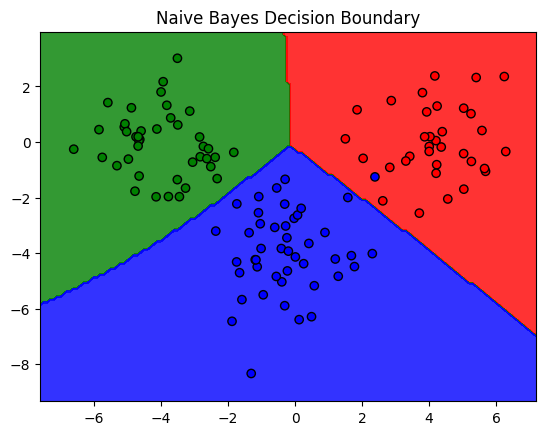

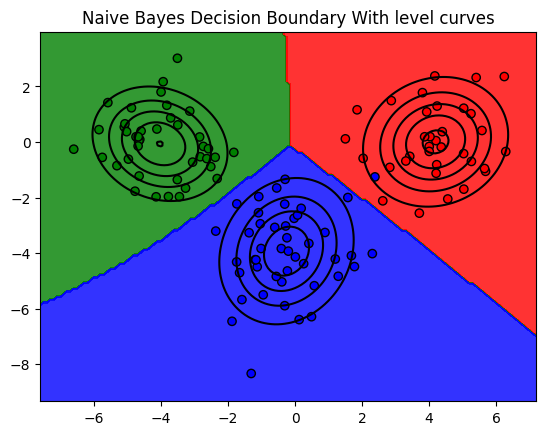

In [ ]:
nb=NaiveBayes()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
display_confusion_matrix(y_test,y_pred,"Naive Bayes")
plot_decision_boundary(nb, x_test, y_test, title="Naive Bayes Decision Boundary")
level_curves=generate_level_curves(x_test,y_test)
plot_decision_boundary(nb, x_test, y_test, title="Naive Bayes Decision Boundary With level curves",level_curves=level_curves)

Bayes Classifier Confusion Matrix:
[[34  0  0]
 [ 0 41  0]
 [ 1  0 44]]


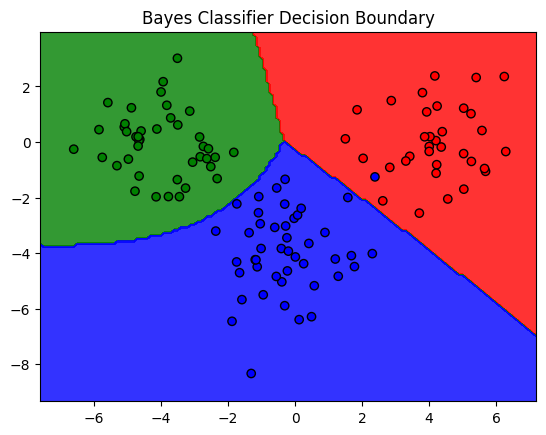

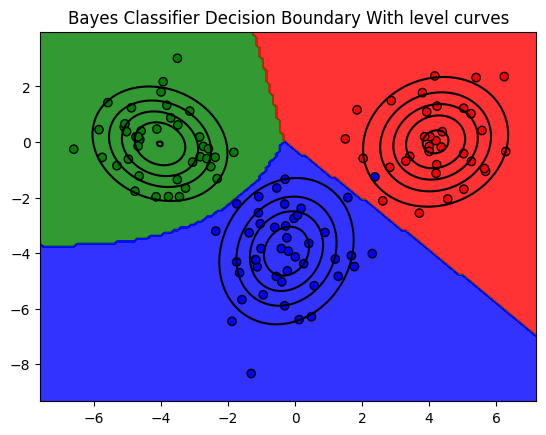

In [ ]:
bc=BayesClassifier()
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
display_confusion_matrix(y_test,y_pred,"Bayes Classifier")
plot_decision_boundary(bc, x_test, y_test, title="Bayes Classifier Decision Boundary")
level_curves=generate_level_curves(x_test,y_test)
plot_decision_boundary(bc, x_test, y_test, title="Bayes Classifier Decision Boundary With level curves",level_curves=level_curves)

# DATASET 2

In [ ]:
train=pd.read_csv('DATASET2/Train.csv')
test=pd.read_csv('DATASET2/Test.csv')
val=pd.read_csv('DATASET2/Val.csv')

In [ ]:
x_train=train.iloc[:,:2].values.astype(np.float64)
y_train=train.iloc[:,2].values.astype(np.float64)
x_test=test.iloc[:,:2].values.astype(np.float64)
y_test=test.iloc[:,2].values.astype(np.float64)
x_val=val.iloc[:,:2].values.astype(np.float64)
y_val=val.iloc[:,2].values.astype(np.float64)

In [ ]:
for i in [1,3,7,15]:
  print(f"KNN with k={i}")
  knn=KNN(i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_val)
  display_confusion_matrix(y_val,y_pred,"knn")
  accuracy=accuracy_score(y_val,y_pred)
  print(accuracy)

KNN with k=1
knn Confusion Matrix:
[[92  0]
 [ 0 67]]
1.0
KNN with k=3
knn Confusion Matrix:
[[92  0]
 [ 0 67]]
1.0
KNN with k=7
knn Confusion Matrix:
[[92  0]
 [ 0 67]]
1.0
KNN with k=15
knn Confusion Matrix:
[[92  0]
 [ 0 67]]
1.0


KNN with k=3


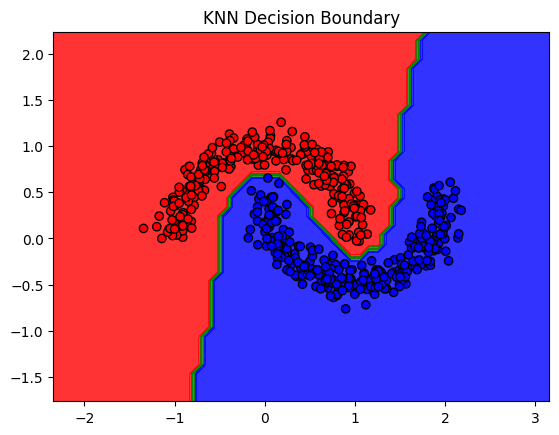

KNN with k=7


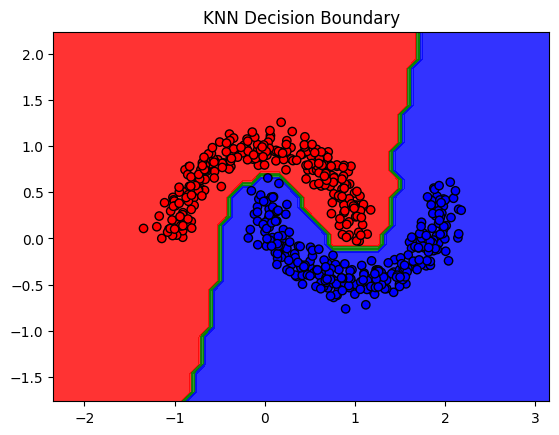

KNN with k=15


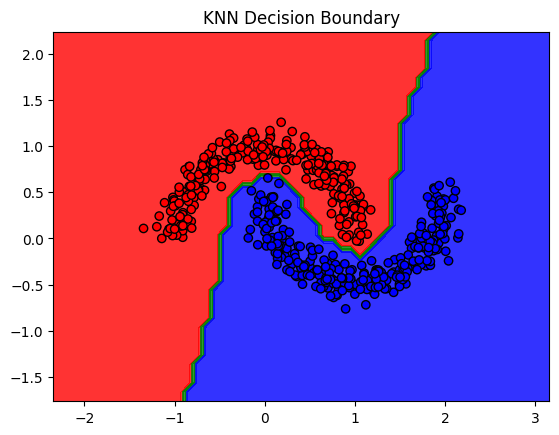

In [ ]:
for i in [3,7,15]:
  print(f"KNN with k={i}")
  knn=KNN(i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_train)
  plot_decision_boundary(knn, x_train, y_train, title="KNN Decision Boundary")

Naive Bayes Confusion Matrix:
[[239  34]
 [ 34 254]]


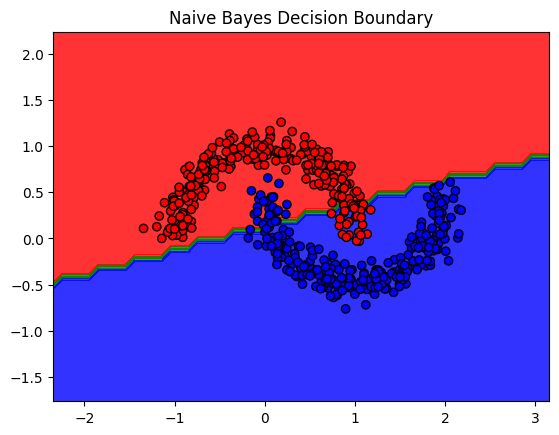

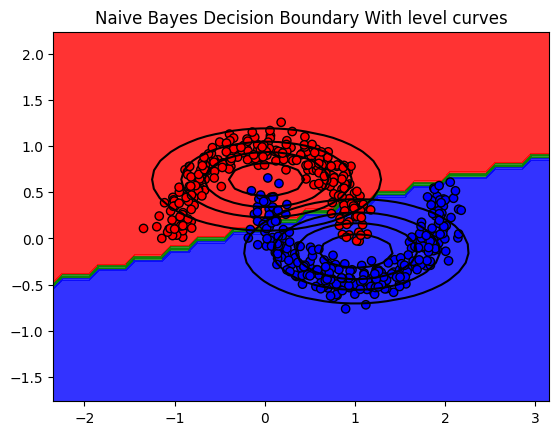

In [ ]:
nb=NaiveBayes()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_train)
display_confusion_matrix(y_train,y_pred,"Naive Bayes")
plot_decision_boundary(nb, x_train, y_train, title="Naive Bayes Decision Boundary")
level_curves=generate_level_curves(x_train,y_train)
plot_decision_boundary(nb, x_train, y_train, title="Naive Bayes Decision Boundary With level curves",level_curves=level_curves)

Bayes Classifier Confusion Matrix:
[[239  34]
 [ 34 254]]


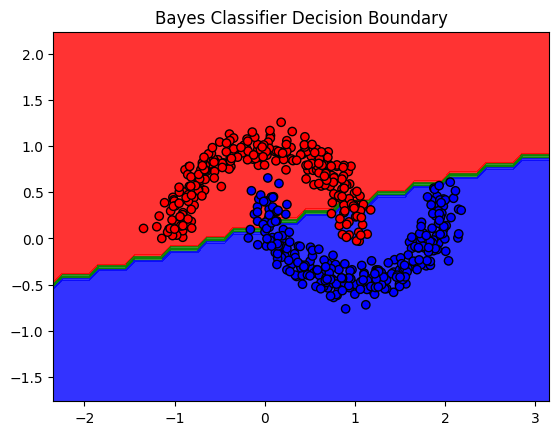

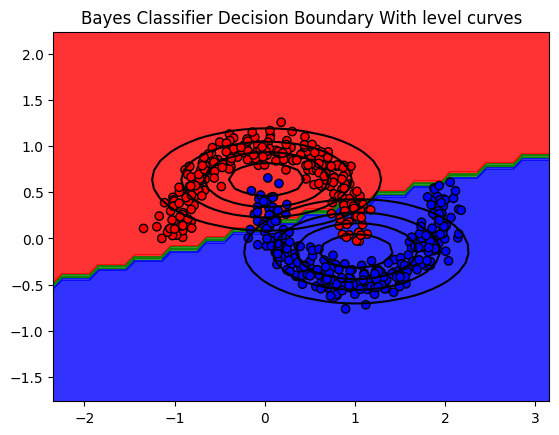

In [ ]:
bc=BayesClassifier()
bc.fit(x_train,y_train)
y_pred=bc.predict(x_train)
display_confusion_matrix(y_train,y_pred,"Bayes Classifier")
plot_decision_boundary(bc, x_train, y_train, title="Bayes Classifier Decision Boundary")
level_curves=generate_level_curves(x_train,y_train)
plot_decision_boundary(bc, x_train, y_train, title="Bayes Classifier Decision Boundary With level curves",level_curves=level_curves)

DATASET3

In [ ]:
train_x=pd.read_csv('DATASET3/train_data.csv')
train_y=pd.read_csv('DATASET3/train_label.csv')
test_x=pd.read_csv('DATASET3/test_data.csv')
test_y=pd.read_csv('DATASET3/test_label.csv')
val_x=pd.read_csv('DATASET3/val_data.csv')
val_y=pd.read_csv('DATASET3/val_label.csv')


In [ ]:
x_train=train_x.iloc[:,:].values.astype(np.float64)
y_train=train_y.iloc[:,0].values.astype(np.float64)
x_test=test_x.iloc[:,:].values.astype(np.float64)
y_test=test_y.iloc[:,0].values.astype(np.float64)
x_val=val_x.iloc[:,:].values.astype(np.float64)
y_val=val_y.iloc[:,0].values.astype(np.float64)

In [ ]:
for i in [3,7,15]:
  print(f"KNN with k={i}")
  knn=KNN(i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_val)
  display_confusion_matrix(y_val,y_pred,"knn")
  accuracy=accuracy_score(y_val,y_pred)
  print(accuracy)

KNN with k=3
knn Confusion Matrix:
[[18 17  7 12  5]
 [16 25 11  4  4]
 [ 5 10 31  9  5]
 [10 13 12 19  6]
 [ 5  4  9  7 35]]
0.4280936454849498
KNN with k=7
knn Confusion Matrix:
[[15 20  7 15  2]
 [17 27  9  4  3]
 [ 5 10 32  9  4]
 [ 8 10 14 23  5]
 [ 2  6  9  6 37]]
0.44816053511705684
KNN with k=15
knn Confusion Matrix:
[[21 21  7 10  0]
 [12 31 10  3  4]
 [ 4 12 29  9  6]
 [ 8 11 15 21  5]
 [ 2  4  9  9 36]]
0.46153846153846156


In [ ]:
nb=NaiveBayes()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_train)
display_confusion_matrix(y_train,y_pred,"Naive Bayes")
accuracy=accuracy_score(y_train,y_pred)
print(accuracy)

Naive Bayes Confusion Matrix:
[[189 109  42  55  24]
 [ 95 209  48  47  21]
 [ 26  48 246  65  35]
 [ 88  64  83 154  31]
 [ 68  29  63  52 208]]
0.47927584564078135


In [ ]:
bc=BayesClassifier()
bc.fit(x_train,y_train)
y_pred=bc.predict(x_train)
display_confusion_matrix(y_train,y_pred,"Bayes Classifier")
accuracy=accuracy_score(y_train,y_pred)
print(accuracy)

Bayes Classifier Confusion Matrix:
[[286  61  31  37   4]
 [ 44 310  20  40   6]
 [ 28  33 311  37  11]
 [ 41  49  42 278  10]
 [ 21  21  41  40 297]]
0.7060505002382087
